## Book Recommendation:

https://hastie.su.domains/ISLP/ISLP_website.pdf.view-in-google.html

## Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np

from numpy import loadtxt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

df = pd.read_csv('churn.txt', sep=',')


## Data Dictionary

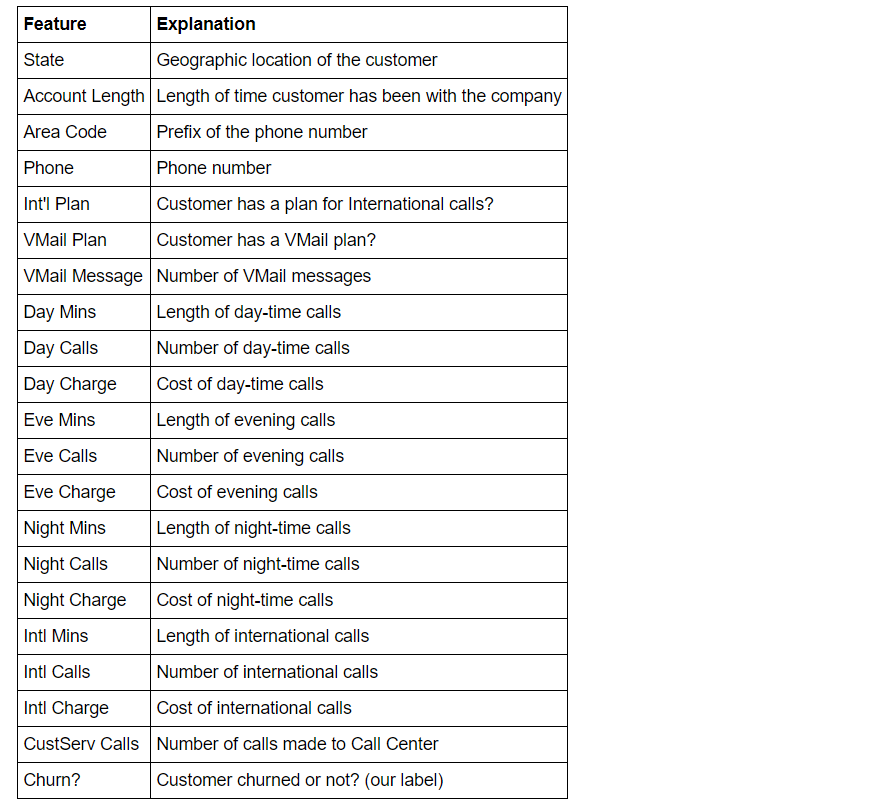

# Exploratory Data Analysis


<img src="maxresdefault.jpg">


_"Ben bir vaka ile karşı karşıya geldiğimde kendime hemen şu 13 soruyu sorarım.
Kaçta? Hangi? Ne ile? Niçin? N'olmuş? Kimi? Nerde? Nasıl? Ne zaman? Kimden? Neyi? Ne belli? Neye? Kim?"_<br>
Dizdar Koşu : https://www.youtube.com/watch?v=9rwf95fkYRU

https://towardsdatascience.com/a-gentle-introduction-to-exploratory-data-analysis-f11d843b8184

In [2]:
df.head(20)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [3]:
df.shape # Beklediğim şekilde mi? Verinin tamamı alınmış mı?

(3333, 21)

In [4]:
df.info() # Veri türünü kontrol et.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

## Update Column Names

In [5]:
new_columns=[x.replace(' ','_').replace("'","").replace("?","").upper() for x in df.columns]
df.columns=list(new_columns)
df.columns

Index(['STATE', 'ACCOUNT_LENGTH', 'AREA_CODE', 'PHONE', 'INTL_PLAN',
       'VMAIL_PLAN', 'VMAIL_MESSAGE', 'DAY_MINS', 'DAY_CALLS', 'DAY_CHARGE',
       'EVE_MINS', 'EVE_CALLS', 'EVE_CHARGE', 'NIGHT_MINS', 'NIGHT_CALLS',
       'NIGHT_CHARGE', 'INTL_MINS', 'INTL_CALLS', 'INTL_CHARGE',
       'CUSTSERV_CALLS', 'CHURN'],
      dtype='object')

## Null Check

In [6]:
df.isnull().sum()

STATE             0
ACCOUNT_LENGTH    0
AREA_CODE         0
PHONE             0
INTL_PLAN         0
VMAIL_PLAN        0
VMAIL_MESSAGE     0
DAY_MINS          0
DAY_CALLS         0
DAY_CHARGE        0
EVE_MINS          0
EVE_CALLS         0
EVE_CHARGE        0
NIGHT_MINS        0
NIGHT_CALLS       0
NIGHT_CHARGE      0
INTL_MINS         0
INTL_CALLS        0
INTL_CHARGE       0
CUSTSERV_CALLS    0
CHURN             0
dtype: int64

## Define Target

In [7]:
df["Target"] = df["CHURN"].map({'True.' : 1, 'False.' : 0})
df.drop("CHURN",axis=1,inplace=True)
df.head()

,STATE,ACCOUNT_LENGTH,AREA_CODE,PHONE,INTL_PLAN,VMAIL_PLAN,VMAIL_MESSAGE,DAY_MINS,DAY_CALLS,DAY_CHARGE,...,EVE_CALLS,EVE_CHARGE,NIGHT_MINS,NIGHT_CALLS,NIGHT_CHARGE,INTL_MINS,INTL_CALLS,INTL_CHARGE,CUSTSERV_CALLS,Target
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [8]:
print(df["Target"].value_counts(normalize=True))

Target
0    0.855086
1    0.144914
Name: proportion, dtype: float64


## Define Variables

In [9]:
cat_columns = list(df.select_dtypes([object]).columns)
cat_columns

['STATE', 'PHONE', 'INTL_PLAN', 'VMAIL_PLAN']

In [10]:
num_columns = list(set(df.columns) - set(cat_columns))
num_columns

['EVE_CALLS',
 'AREA_CODE',
 'VMAIL_MESSAGE',
 'INTL_CHARGE',
 'DAY_CHARGE',
 'Target',
 'INTL_MINS',
 'INTL_CALLS',
 'NIGHT_CALLS',
 'DAY_CALLS',
 'NIGHT_MINS',
 'ACCOUNT_LENGTH',
 'EVE_MINS',
 'DAY_MINS',
 'EVE_CHARGE',
 'NIGHT_CHARGE',
 'CUSTSERV_CALLS']

In [11]:
cat_columns.append('AREA_CODE')
num_columns.remove('AREA_CODE')

In [12]:
cat_columns

['STATE', 'PHONE', 'INTL_PLAN', 'VMAIL_PLAN', 'AREA_CODE']

In [13]:
num_columns

['EVE_CALLS',
 'VMAIL_MESSAGE',
 'INTL_CHARGE',
 'DAY_CHARGE',
 'Target',
 'INTL_MINS',
 'INTL_CALLS',
 'NIGHT_CALLS',
 'DAY_CALLS',
 'NIGHT_MINS',
 'ACCOUNT_LENGTH',
 'EVE_MINS',
 'DAY_MINS',
 'EVE_CHARGE',
 'NIGHT_CHARGE',
 'CUSTSERV_CALLS']

## Basic Statistics

In [14]:
percentile = [0.01] + (np.arange(0,20)*0.05).tolist() + [0.99]
df[num_columns].describe(percentiles = percentile).T #Temel İstatistikler

,count,mean,std,min,0%,1%,5%,10%,15%,20%,...,60%,65%,70%,75%,80%,85%,90%,95%,99%,max
EVE_CALLS,3333.0,100.114311,19.922625,0.00,0.00,53.0000,67.000,75.000,80.00,84.000,...,105.000,108.00,111.000,114.00,117.000,120.000,125.000,133.000,147.0000,170.00
VMAIL_MESSAGE,3333.0,8.099010,13.688365,0.00,0.00,0.0000,0.000,0.000,0.00,0.000,...,0.000,0.00,0.000,20.00,25.000,29.000,32.000,36.000,43.0000,51.00
INTL_CHARGE,3333.0,2.764581,0.753773,0.00,0.00,0.8996,1.540,1.810,2.03,2.160,...,2.970,3.05,3.160,3.27,3.380,3.510,3.700,3.970,4.5004,5.40
DAY_CHARGE,3333.0,30.562307,9.259435,0.00,0.00,8.8132,15.288,18.754,21.13,22.908,...,32.980,34.19,35.488,36.79,38.212,40.170,42.428,46.028,51.8768,59.64
Target,3333.0,0.144914,0.352067,0.00,0.00,0.0000,0.000,0.000,0.00,0.000,...,0.000,0.00,0.000,0.00,0.000,0.000,1.000,1.000,1.0000,1.00
INTL_MINS,3333.0,10.237294,2.791840,0.00,0.00,3.3320,5.700,6.700,7.50,8.000,...,11.000,11.30,11.700,12.10,12.500,13.000,13.700,14.700,16.6680,20.00
INTL_CALLS,3333.0,4.479448,2.461214,0.00,0.00,1.0000,1.000,2.000,2.00,2.400,...,5.000,5.00,5.000,6.00,6.000,7.000,8.000,9.000,13.0000,20.00
NIGHT_CALLS,3333.0,100.107711,19.568609,33.00,33.00,57.0000,68.000,75.000,79.00,83.000,...,105.000,108.00,110.000,113.00,117.000,120.000,125.000,132.000,146.6800,175.00
DAY_CALLS,3333.0,100.435644,20.069084,0.00,0.00,54.0000,67.000,74.200,80.00,84.000,...,106.000,108.00,111.000,114.00,117.000,121.000,126.000,133.000,146.0000,165.00
NIGHT_MINS,3333.0,200.872037,50.573847,23.20,23.20,79.4280,118.180,136.340,148.70,158.600,...,214.000,220.60,227.540,235.30,243.900,253.820,264.200,282.840,317.4480,395.00


In [15]:
for x in df[cat_columns]:
    print("Number of unique value of {} is {}".format(x,df[x].nunique()))

Number of unique value of STATE is 51
Number of unique value of PHONE is 3333
Number of unique value of INTL_PLAN is 2
Number of unique value of VMAIL_PLAN is 2
Number of unique value of AREA_CODE is 3


In [16]:
for col in cat_columns:
    print(df[col].value_counts(), '\n')

STATE
WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: count, dtype: int64 

PHONE
382-4657    1
348-7071    1
389-6082    1
415-3689    1
379-2503    1
           ..
352-1127    1
368-1288    1
403-5279    1
397-9333    1
400-4344    1
Name: count, Length: 3333, dtype: int64 

INTL_PLAN
no     3010
yes     323
Name: count, dtype: int64 

VMAIL_PLAN
no     2411
yes     922
Name: count, dtype: int64 

AREA_CODE
415    1655
510     840
408     838
Name: count, dtype: int64 



In [17]:
df.PHONE.drop_duplicates() 

0       382-4657
1       371-7191
2       358-1921
3       375-9999
4       330-6626
          ...   
3328    414-4276
3329    370-3271
3330    328-8230
3331    364-6381
3332    400-4344
Name: PHONE, Length: 3333, dtype: object

## Correlation Elimination

<Axes: >

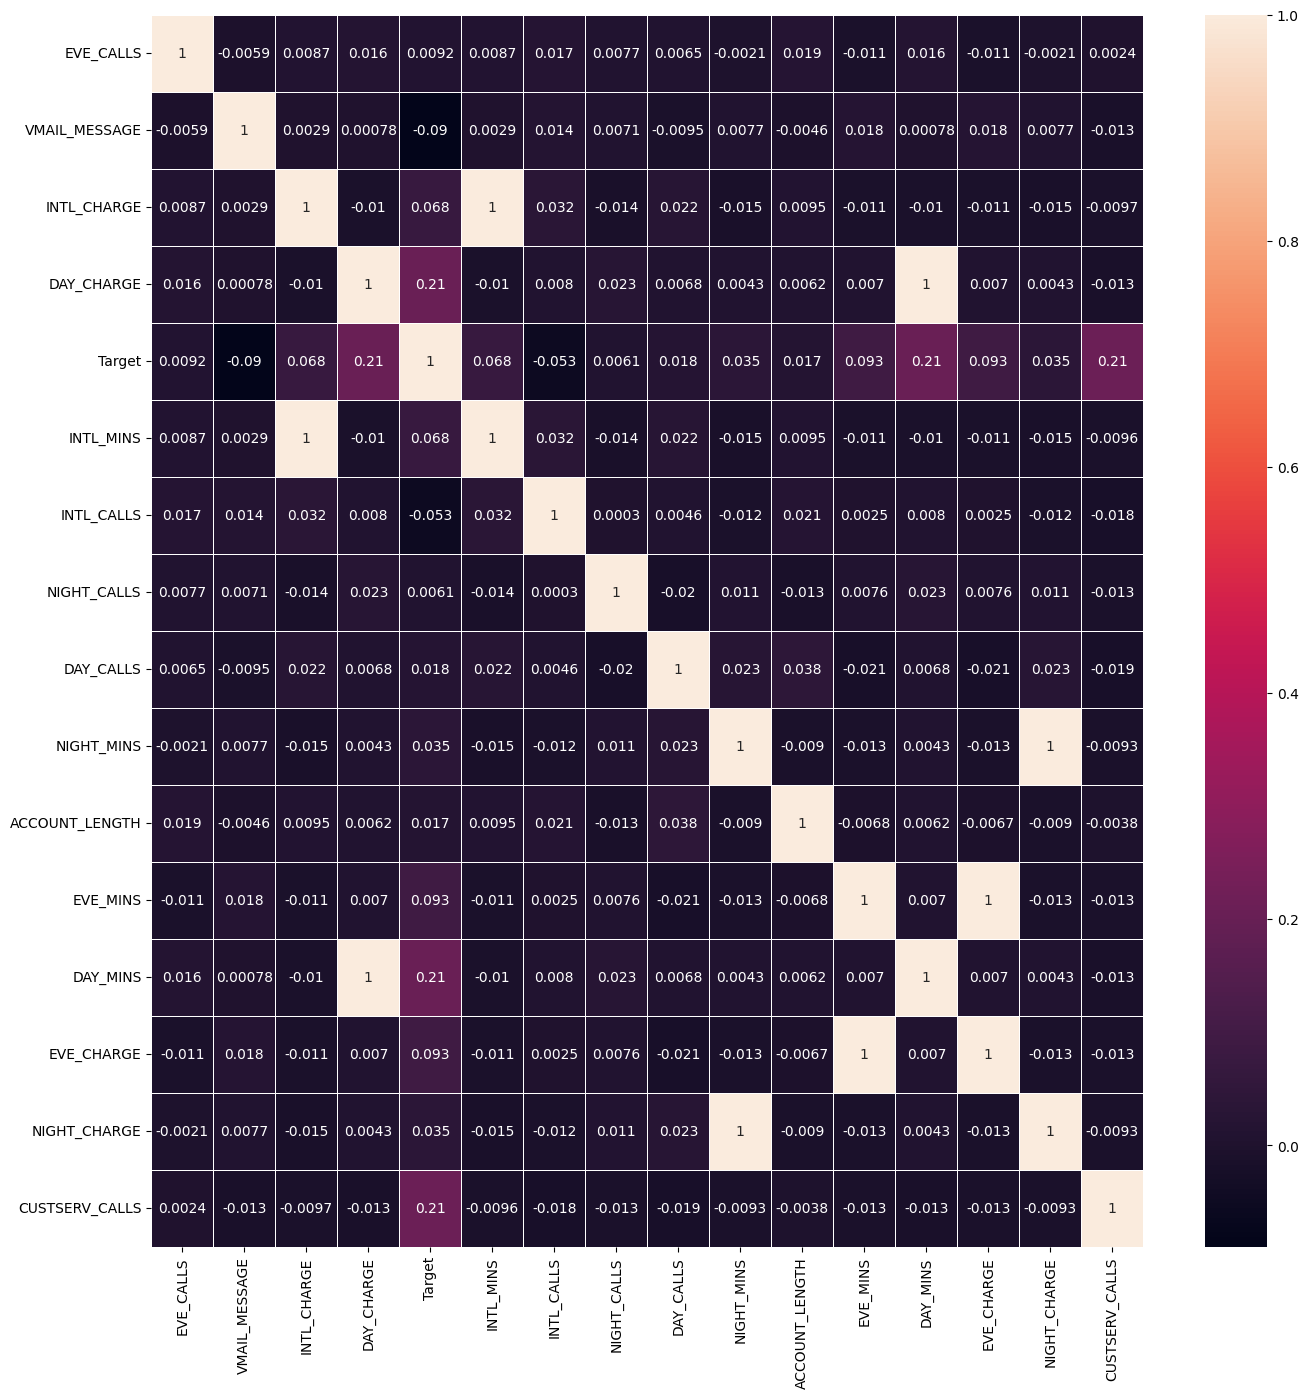

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(16,16))        
sns.heatmap(df[num_columns].corr(), annot=True, linewidths=.5, ax=ax)

#https://matplotlib.org/2.0.2/users/pyplot_tutorial.html matplotlib tutorial

In [19]:
corr_modelvar= df[num_columns].corr()
corr_variables = []
for i in range(len(corr_modelvar)):
    for col in corr_modelvar.columns:
        if corr_modelvar.iloc[i][col]>0.8 or corr_modelvar.iloc[i][col]<-0.8:
            if corr_modelvar.index[i]!=col:
                corr_variables.append([corr_modelvar.index[i],col,corr_modelvar.iloc[i][col]])
                
corr_variables

[['INTL_CHARGE', 'INTL_MINS', 0.9999927417510313],
 ['DAY_CHARGE', 'DAY_MINS', 0.9999999521904008],
 ['INTL_MINS', 'INTL_CHARGE', 0.9999927417510313],
 ['NIGHT_MINS', 'NIGHT_CHARGE', 0.9999992148758795],
 ['EVE_MINS', 'EVE_CHARGE', 0.9999997760198491],
 ['DAY_MINS', 'DAY_CHARGE', 0.9999999521904008],
 ['EVE_CHARGE', 'EVE_MINS', 0.9999997760198491],
 ['NIGHT_CHARGE', 'NIGHT_MINS', 0.9999992148758795]]

In [20]:
# korole olanlar df'e atıldı
df_corr_variables = pd.DataFrame(corr_variables,columns=['variable1', 'variable2', 'correlation'])
df_corr_variables

,variable1,variable2,correlation
0,INTL_CHARGE,INTL_MINS,0.999993
1,DAY_CHARGE,DAY_MINS,1.000000
2,INTL_MINS,INTL_CHARGE,0.999993
3,NIGHT_MINS,NIGHT_CHARGE,0.999999
4,EVE_MINS,EVE_CHARGE,1.000000
5,DAY_MINS,DAY_CHARGE,1.000000
6,EVE_CHARGE,EVE_MINS,1.000000
7,NIGHT_CHARGE,NIGHT_MINS,0.999999


In [21]:
df.drop(["DAY_MINS","EVE_MINS","NIGHT_MINS","INTL_MINS"],axis=1,inplace=True)

## Train Test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df, df["Target"], test_size =0.3, shuffle = True, stratify=df["Target"])

In [23]:
X_train.head()

,STATE,ACCOUNT_LENGTH,AREA_CODE,PHONE,INTL_PLAN,VMAIL_PLAN,VMAIL_MESSAGE,DAY_CALLS,DAY_CHARGE,EVE_CALLS,EVE_CHARGE,NIGHT_CALLS,NIGHT_CHARGE,INTL_CALLS,INTL_CHARGE,CUSTSERV_CALLS,Target
563,ID,99,415,406-7261,no,no,0,106,24.75,106,8.36,83,10.39,5,2.94,1,0
2269,AK,138,415,340-3409,no,yes,37,102,12.89,147,14.76,96,7.32,13,2.21,0,0
376,DC,138,415,329-6562,no,no,0,87,28.99,116,10.05,111,8.46,7,3.02,2,0
3179,UT,110,408,332-1690,no,no,0,102,32.74,118,15.21,74,9.66,4,2.54,1,0
1914,UT,61,408,335-9726,no,yes,25,78,27.83,112,9.62,118,6.03,3,2.67,3,0


In [24]:
X_train.columns

Index(['STATE', 'ACCOUNT_LENGTH', 'AREA_CODE', 'PHONE', 'INTL_PLAN',
       'VMAIL_PLAN', 'VMAIL_MESSAGE', 'DAY_CALLS', 'DAY_CHARGE', 'EVE_CALLS',
       'EVE_CHARGE', 'NIGHT_CALLS', 'NIGHT_CHARGE', 'INTL_CALLS',
       'INTL_CHARGE', 'CUSTSERV_CALLS', 'Target'],
      dtype='object')

In [25]:
print(X_train.shape,X_test.shape)

(2333, 17) (1000, 17)


In [26]:
y_train.value_counts()

Target
0    1995
1     338
Name: count, dtype: int64

In [27]:
y_test.value_counts()

Target
0    855
1    145
Name: count, dtype: int64

## Data Transformation

### Categorical Variables

In [28]:
cat_columns

['STATE', 'PHONE', 'INTL_PLAN', 'VMAIL_PLAN', 'AREA_CODE']

In [29]:
#Check the train categories represent the entire dataset.
for x in X_train[cat_columns]:
    print("Number of unique value of {} is {}".format(x,X_train[x].nunique()))

Number of unique value of STATE is 51
Number of unique value of PHONE is 2333
Number of unique value of INTL_PLAN is 2
Number of unique value of VMAIL_PLAN is 2
Number of unique value of AREA_CODE is 3


In [30]:
for x in df[cat_columns]:
    print("Number of unique value of {} is {}".format(x,df[x].nunique()))

Number of unique value of STATE is 51
Number of unique value of PHONE is 3333
Number of unique value of INTL_PLAN is 2
Number of unique value of VMAIL_PLAN is 2
Number of unique value of AREA_CODE is 3


#### Label Encoding

In [31]:
for x in ["INTL_PLAN","VMAIL_PLAN"]:
    print(X_train[x].value_counts(normalize=True))
    print("----")

INTL_PLAN
no     0.897985
yes    0.102015
Name: proportion, dtype: float64
----
VMAIL_PLAN
no     0.718817
yes    0.281183
Name: proportion, dtype: float64
----


In [32]:
#train ve test datasında ayrı ayrı transformasyon
X_train["INTL_PLAN"]=X_train["INTL_PLAN"].map({"yes":1,"no":0})
X_train["VMAIL_PLAN"]=X_train["VMAIL_PLAN"].map({"yes":1,"no":0})

X_test["INTL_PLAN"]=X_test["INTL_PLAN"].map({"yes":1,"no":0})
X_test["VMAIL_PLAN"]=X_test["VMAIL_PLAN"].map({"yes":1,"no":0})

X_train[["INTL_PLAN","VMAIL_PLAN"]].head()

,INTL_PLAN,VMAIL_PLAN
563,0,0
2269,0,1
376,0,0
3179,0,0
1914,0,1


#### Target Encoding - WOE

In [33]:
weight_of_evidince_state=X_train.groupby(["STATE"])["Target"].agg(["mean"]).to_dict()["mean"]
weight_of_evidince_state

{'AK': 0.08333333333333333,
 'AL': 0.10909090909090909,
 'AR': 0.16666666666666666,
 'AZ': 0.06976744186046512,
 'CA': 0.25,
 'CO': 0.14814814814814814,
 'CT': 0.1509433962264151,
 'DC': 0.05263157894736842,
 'DE': 0.0975609756097561,
 'FL': 0.13725490196078433,
 'GA': 0.10526315789473684,
 'HI': 0.08571428571428572,
 'IA': 0.10714285714285714,
 'ID': 0.13043478260869565,
 'IL': 0.09302325581395349,
 'IN': 0.15384615384615385,
 'KS': 0.2127659574468085,
 'KY': 0.14634146341463414,
 'LA': 0.08823529411764706,
 'MA': 0.14285714285714285,
 'MD': 0.22916666666666666,
 'ME': 0.24444444444444444,
 'MI': 0.2545454545454545,
 'MN': 0.19672131147540983,
 'MO': 0.10638297872340426,
 'MS': 0.16326530612244897,
 'MT': 0.2222222222222222,
 'NC': 0.16666666666666666,
 'ND': 0.1,
 'NE': 0.08888888888888889,
 'NH': 0.21428571428571427,
 'NJ': 0.22727272727272727,
 'NM': 0.09302325581395349,
 'NV': 0.2222222222222222,
 'NY': 0.1724137931034483,
 'OH': 0.1076923076923077,
 'OK': 0.17073170731707318,
 'O

In [34]:
# Map kullanılırken dikkatli olunmalı. Değer yoksa null atar.
X_train["STATE_WOE"]=X_train["STATE"].map(weight_of_evidince_state)
X_test["STATE_WOE"]=X_test["STATE"].map(weight_of_evidince_state)

In [35]:
X_train[["STATE","STATE_WOE"]].head()

,STATE,STATE_WOE
563,ID,0.130435
2269,AK,0.083333
376,DC,0.052632
3179,UT,0.122449
1914,UT,0.122449


In [36]:
X_test[["STATE","STATE_WOE"]].head()

,STATE,STATE_WOE
3158,RI,0.081081
2506,VT,0.117647
476,UT,0.122449
2906,CA,0.250000
1682,AK,0.083333


In [37]:
#orjinal kolonlar drop edildi
X_train.drop("STATE",axis=1,inplace=True)
X_test.drop("STATE",axis=1,inplace=True)

In [38]:
#telefon numarasının ilk 3 karakterini alacak fonksiyon
def phone_convert(x):
    return x[0:3]

In [39]:
#train ve test verisi için transformasyon
X_train["PHONE_MAIN"]=df["PHONE"].map(phone_convert)
X_test["PHONE_MAIN"]=df["PHONE"].map(phone_convert)

In [40]:
X_train[["PHONE_MAIN","PHONE"]].head()

,PHONE_MAIN,PHONE
563,406,406-7261
2269,340,340-3409
376,329,329-6562
3179,332,332-1690
1914,335,335-9726


In [41]:
# herbir kategorik değerin target ortalaması
weight_of_evidince_phone=X_train.groupby(["PHONE_MAIN"])["Target"].agg(["mean"]).to_dict()["mean"]

In [42]:
#train ve test verisi için transformasyon
X_train["PHONE_MAIN_WOE"]=X_train["PHONE_MAIN"].map(weight_of_evidince_phone)
X_test["PHONE_MAIN_WOE"]=X_test["PHONE_MAIN"].map(weight_of_evidince_phone)

In [43]:
X_train.drop("PHONE_MAIN",axis=1,inplace=True)
X_train.drop("PHONE",axis=1,inplace=True)

X_test.drop("PHONE_MAIN",axis=1,inplace=True)
X_test.drop("PHONE",axis=1,inplace=True)

#### One Hot Encoding

In [44]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(X_train["AREA_CODE"].to_frame()) #fit
enc.transform(X_train["AREA_CODE"].to_frame()).toarray() #transform


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [45]:
#Yeni Değişkenler yaratıldı
X_train[["AREA_1","AREA_2","AREA_3"]]=enc.transform(X_train["AREA_CODE"].to_frame()).toarray() # zaman kalırsa for loop 
X_test[["AREA_1","AREA_2","AREA_3"]]=enc.transform(X_test["AREA_CODE"].to_frame()).toarray()

In [46]:
X_train.head()

,ACCOUNT_LENGTH,AREA_CODE,INTL_PLAN,VMAIL_PLAN,VMAIL_MESSAGE,DAY_CALLS,DAY_CHARGE,EVE_CALLS,EVE_CHARGE,NIGHT_CALLS,NIGHT_CHARGE,INTL_CALLS,INTL_CHARGE,CUSTSERV_CALLS,Target,STATE_WOE,PHONE_MAIN_WOE,AREA_1,AREA_2,AREA_3
563,99,415,0,0,0,106,24.75,106,8.36,83,10.39,5,2.94,1,0,0.130435,0.160000,0.0,1.0,0.0
2269,138,415,0,1,37,102,12.89,147,14.76,96,7.32,13,2.21,0,0,0.083333,0.074074,0.0,1.0,0.0
376,138,415,0,0,0,87,28.99,116,10.05,111,8.46,7,3.02,2,0,0.052632,0.153846,0.0,1.0,0.0
3179,110,408,0,0,0,102,32.74,118,15.21,74,9.66,4,2.54,1,0,0.122449,0.148148,1.0,0.0,0.0
1914,61,408,0,1,25,78,27.83,112,9.62,118,6.03,3,2.67,3,0,0.122449,0.259259,1.0,0.0,0.0


In [47]:
#orjinal kolon drop edildi
X_train.drop("AREA_CODE",axis=1,inplace=True)
X_test.drop("AREA_CODE",axis=1,inplace=True)

#target drop edildi
X_train.drop("Target",axis=1,inplace=True)
X_test.drop("Target",axis=1,inplace=True)

### Numerical Variables

In [49]:
scale_list=["ACCOUNT_LENGTH",
"VMAIL_MESSAGE",
"DAY_CALLS",
"DAY_CHARGE",
"EVE_CALLS",
"EVE_CHARGE",
"NIGHT_CALLS",
"NIGHT_CHARGE",
"INTL_CALLS",
"INTL_CHARGE",
"CUSTSERV_CALLS"]

In [50]:
scaler = MinMaxScaler()

In [51]:
X_train[scale_list]=scaler.fit_transform(X_train[scale_list]) # fit and transform
X_test[scale_list]=scaler.transform(X_test[scale_list]) # transform

In [52]:
X_train.head()

,ACCOUNT_LENGTH,INTL_PLAN,VMAIL_PLAN,VMAIL_MESSAGE,DAY_CALLS,DAY_CHARGE,EVE_CALLS,EVE_CHARGE,NIGHT_CALLS,NIGHT_CHARGE,INTL_CALLS,INTL_CHARGE,CUSTSERV_CALLS,STATE_WOE,PHONE_MAIN_WOE,AREA_1,AREA_2,AREA_3
563,0.404959,0,0,0.000000,0.642424,0.414990,0.623529,0.270463,0.352113,0.558876,0.25,0.544444,0.111111,0.130435,0.160000,0.0,1.0,0.0
2269,0.566116,0,1,0.725490,0.618182,0.216130,0.864706,0.477515,0.443662,0.375374,0.65,0.409259,0.000000,0.083333,0.074074,0.0,1.0,0.0
376,0.566116,0,0,0.000000,0.527273,0.486083,0.682353,0.325137,0.549296,0.443515,0.35,0.559259,0.222222,0.052632,0.153846,0.0,1.0,0.0
3179,0.450413,0,0,0.000000,0.618182,0.548960,0.694118,0.492074,0.288732,0.515242,0.20,0.470370,0.111111,0.122449,0.148148,1.0,0.0,0.0
1914,0.247934,0,1,0.490196,0.472727,0.466633,0.658824,0.311226,0.598592,0.298267,0.15,0.494444,0.333333,0.122449,0.259259,1.0,0.0,0.0


In [53]:
X_test.head()

,ACCOUNT_LENGTH,INTL_PLAN,VMAIL_PLAN,VMAIL_MESSAGE,DAY_CALLS,DAY_CHARGE,EVE_CALLS,EVE_CHARGE,NIGHT_CALLS,NIGHT_CHARGE,INTL_CALLS,INTL_CHARGE,CUSTSERV_CALLS,STATE_WOE,PHONE_MAIN_WOE,AREA_1,AREA_2,AREA_3
3158,0.132231,0,0,0.000000,0.672727,0.525654,0.647059,0.560336,0.471831,0.576210,0.25,0.464815,0.333333,0.081081,0.095238,0.0,1.0,0.0
2506,0.566116,0,0,0.000000,0.648485,0.655936,0.705882,0.582983,0.605634,0.408249,0.20,0.659259,0.111111,0.117647,0.074074,0.0,1.0,0.0
476,0.202479,0,0,0.000000,0.642424,0.735748,0.623529,0.443869,0.542254,0.543335,0.25,0.585185,0.111111,0.122449,0.160000,0.0,0.0,1.0
2906,0.355372,0,1,0.372549,0.739394,0.472669,0.523529,0.514073,0.316901,0.609683,0.00,0.000000,0.111111,0.250000,0.200000,0.0,1.0,0.0
1682,0.392562,0,1,0.568627,0.551515,0.427565,0.441176,0.438369,0.154930,0.551106,0.15,0.425926,0.111111,0.083333,0.190476,1.0,0.0,0.0


## Modelling - Logistic Regression

### Train

Logistic regression cost function:

 <img src="mzAMA.png">

with l2 norm:

 
<img src="Ke67p.png">

From the equation, it's clear that the regularization term is there to penalize large coefficients (the minimization problem is solving for the coefficients that minimize the objective function). Since the size of each coefficient depends on the scale of its corresponding variable, scaling the data is required so that the regularization penalizes each variable equally.

In [57]:
logisticRegr = LogisticRegression(solver="liblinear")
# See: https://medium.com/@arnavr/scikit-learn-solvers-explained-780a17bc322d

In [58]:
logisticRegr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [62]:
logisticRegr.set_params

<bound method BaseEstimator.set_params of LogisticRegression(solver='liblinear')>

In [63]:
X_train.shape

(2333, 18)

In [64]:
logisticRegr.intercept_

array([-4.62927382])

In [65]:
logisticRegr.coef_

array([[-0.12716192,  1.98284987, -1.27423928,  0.62282247,  0.02244146,
         3.15457055, -0.3849944 ,  1.67170384, -0.71517115,  0.71993195,
        -1.32872887,  0.86845129,  3.66481201,  3.0965677 ,  3.66823356,
        -1.49091034, -1.4812292 , -1.65713429]])

### Predict

In [67]:
#Predict Class
y_train_pred=logisticRegr.predict(X_train)
y_test_pred=logisticRegr.predict(X_test)


In [68]:
#Predict Proba

y_train_proba=logisticRegr.predict_proba(X_train)[:,1]
y_test_proba=logisticRegr.predict_proba(X_test)[:,1]

### Performance

### ROC & AUC

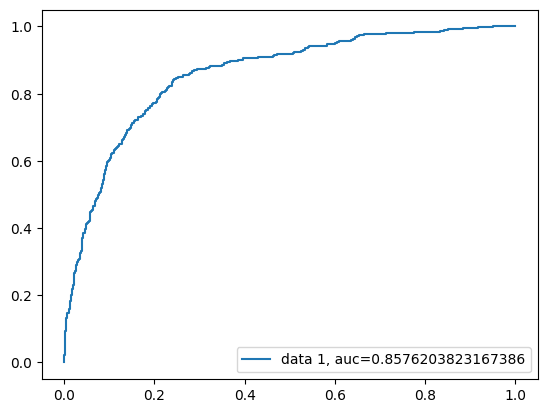

In [73]:
fpr, tpr, _ = metrics.roc_curve(y_train,  y_train_proba)
auc = metrics.roc_auc_score(y_train, y_train_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

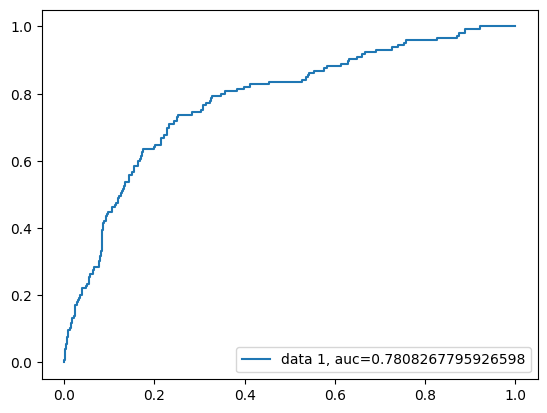

In [72]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_test_proba)
auc = metrics.roc_auc_score(y_test, y_test_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Confusion Matrix

# 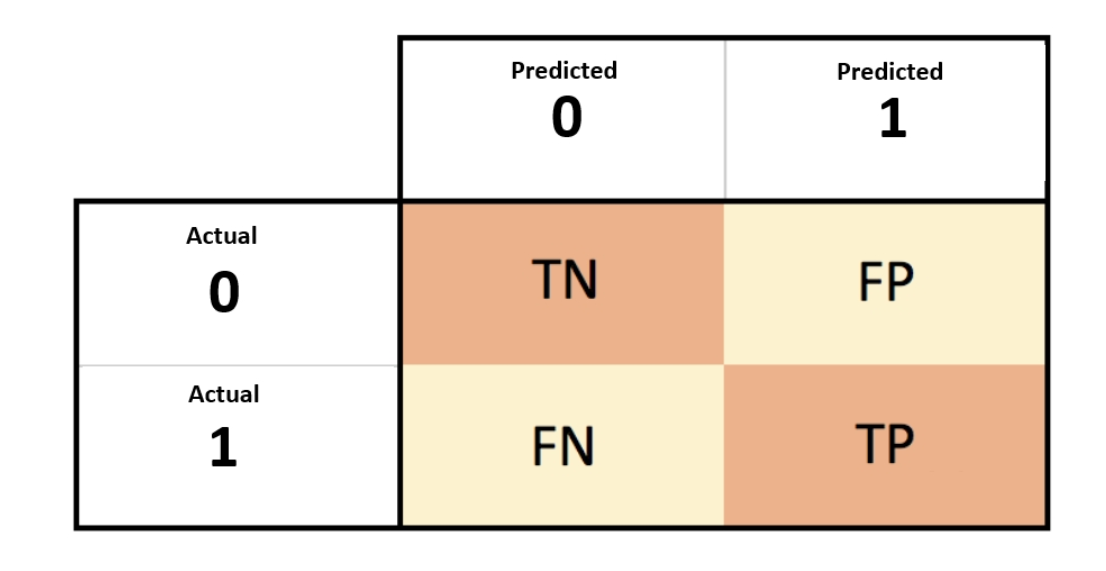

In [77]:
confusion_matrix(y_train, y_train_pred)

array([[1970,   28],
       [ 272,   63]])

### Confusion Matrix Metrics

In [75]:
print("accuracy score is ",accuracy_score(y_train, y_train_pred))
print("precision score is ",precision_score(y_train, y_train_pred))
print("recall score is ",recall_score(y_train, y_train_pred))
print("f1 score is ",f1_score(y_train, y_train_pred))

accuracy score is  0.871410201457351
precision score is  0.6727272727272727
recall score is  0.21893491124260356
f1 score is  0.33035714285714285


In [76]:
print("accuracy score is ",accuracy_score(y_test, y_test_pred))
print("precision score is ",precision_score(y_test, y_test_pred))
print("recall score is ",recall_score(y_test, y_test_pred))
print("f1 score is ",f1_score(y_test, y_test_pred))

accuracy score is  0.857
precision score is  0.5238095238095238
recall score is  0.15172413793103448
f1 score is  0.23529411764705882


# Grid Search

<img src="1_dldTNMhgjNNeu7d0OmNPCA.webp">

In [77]:
logisticRegr = LogisticRegression(solver="liblinear")
#Randomized Search
grid_search_params = {'C' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
                         'penalty' : ["l1","l2"],
                        }

search=GridSearchCV(logisticRegr, grid_search_params, scoring='roc_auc',cv=5, n_jobs=-1,verbose=3)

result = search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 4/5] END .................C=0.6, penalty=l2;, score=0.860 total time=   0.0s
[CV 5/5] END .................C=0.6, penalty=l2;, score=0.817 total time=   0.0s
[CV 1/5] END .................C=0.1, penalty=l2;, score=0.797 total time=   0.0s
[CV 1/5] END .................C=0.8, penalty=l2;, score=0.845 total time=   0.0s
[CV 4/5] END .................C=0.8, penalty=l1;, score=0.866 total time=   0.1s
[CV 1/5] END .................C=0.7, penalty=l1;, score=0.855 total time=   0.1s
[CV 3/5] END .................C=0.8, penalty=l1;, score=0.880 total time=   0.1s
[CV 5/5] END .................C=0.8, penalty=l2;, score=0.820 total time=   0.0s
[CV 2/5] END .................C=0.2, penalty=l2;, score=0.781 total time=   0.0s
[CV 1/5] END .................C=0.3, penalty=l2;, score=0.829 total time=   0.0s
[CV 4/5] END .................C=0.1, penalty=l1;, score=0.812 total time=   0.0s
[CV 1/5] END .................C=0.7, penalty=l2;

In [78]:
result.best_params_

{'C': 0.9, 'penalty': 'l1'}

In [79]:
result.best_score_

0.8526689858975797

In [80]:
y_train_pred_gs=result.predict(X_train)
y_test_pred_gs=result.predict(X_test)
y_train_proba_gs=result.predict_proba(X_train)[:,1]
y_test_proba_gs=result.predict_proba(X_test)[:,1]

In [85]:
print("accuracy score is ",accuracy_score(y_train, y_train_pred_gs))
print("precision score is ",precision_score(y_train, y_train_pred_gs))
print("recall score is ",recall_score(y_train, y_train_pred_gs))
print("f1 score is ",f1_score(y_train, y_train_pred_gs))

accuracy score is  0.8795542220317188
precision score is  0.696551724137931
recall score is  0.2988165680473373
f1 score is  0.4182194616977226


In [87]:
print("accuracy score is ",accuracy_score(y_test, y_test_pred_gs))
print("precision score is ",precision_score(y_test, y_test_pred_gs))
print("recall score is ",recall_score(y_test, y_test_pred_gs))
print("f1 score is ",f1_score(y_test, y_test_pred_gs))

accuracy score is  0.859
precision score is  0.54
recall score is  0.18620689655172415
f1 score is  0.27692307692307694


# Cut Off

In [88]:
cut_off_pd=y_train.to_frame()

In [89]:
cut_off_pd["proba"]=y_train_proba_gs

In [90]:
cut_off_pd.head()

,Target,proba
563,0,0.030198
2269,0,0.000920
376,0,0.031749
3179,0,0.068532
1914,0,0.053155


In [91]:
i=0
result_df=pd.DataFrame(columns=["cut_off","accuracy","precision","recall","f1"])
for y in [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]:
    cut_off_pd["pred"]=cut_off_pd["proba"].map(lambda x: 1 if x>=y else 0)
    print(y)
    print("accuracy score is {}".format(accuracy_score(cut_off_pd["Target"], cut_off_pd["pred"])))
    print("precision score is {}".format(precision_score(cut_off_pd["Target"], cut_off_pd["pred"])))
    print("recall score is {}".format(recall_score(cut_off_pd["Target"], cut_off_pd["pred"])))
    print("f1 score is {}".format(f1_score(cut_off_pd["Target"], cut_off_pd["pred"])))
    print("---")
    result_df.loc[i,"cut_off"]=y
    result_df.loc[i,"precision"]=precision_score(cut_off_pd["Target"], cut_off_pd["pred"])
    result_df.loc[i,"accuracy"]=accuracy_score(cut_off_pd["Target"], cut_off_pd["pred"])
    result_df.loc[i,"recall"]=recall_score(cut_off_pd["Target"], cut_off_pd["pred"])
    result_df.loc[i,"f1"]=f1_score(cut_off_pd["Target"], cut_off_pd["pred"])
    i=i+1
    

0.1
accuracy score is 0.6990998714102015
precision score is 0.3112033195020747
recall score is 0.8875739644970414
f1 score is 0.4608294930875576
---
0.15
accuracy score is 0.7912558936990999
precision score is 0.39092240117130306
recall score is 0.7899408284023669
f1 score is 0.5230166503428012
---
0.2
accuracy score is 0.8281183026146592
precision score is 0.4419889502762431
recall score is 0.7100591715976331
f1 score is 0.5448354143019297
---
0.25
accuracy score is 0.8512644663523361
precision score is 0.4896551724137931
recall score is 0.6301775147928994
f1 score is 0.5510996119016818
---
0.3
accuracy score is 0.866695242177454
precision score is 0.5393586005830904
recall score is 0.5473372781065089
f1 score is 0.5433186490455213
---
0.35
accuracy score is 0.873981997428204
precision score is 0.5808823529411765
recall score is 0.46745562130177515
f1 score is 0.5180327868852459
---
0.4
accuracy score is 0.8761251607372482
precision score is 0.6150234741784038
recall score is 0.387573

In [92]:
result_df

,cut_off,accuracy,precision,recall,f1
0,0.1,0.6991,0.311203,0.887574,0.460829
1,0.15,0.791256,0.390922,0.789941,0.523017
2,0.2,0.828118,0.441989,0.710059,0.544835
3,0.25,0.851264,0.489655,0.630178,0.5511
4,0.3,0.866695,0.539359,0.547337,0.543319
5,0.35,0.873982,0.580882,0.467456,0.518033
6,0.4,0.876125,0.615023,0.387574,0.475499
7,0.45,0.876554,0.638889,0.340237,0.444015
8,0.5,0.879554,0.696552,0.298817,0.418219
9,0.55,0.878268,0.725,0.257396,0.379913


## Modelling - Decision Tree

In [149]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier(random_state=0, max_depth = 5)
result_clf = clf.fit(X_train, y_train)

In [150]:
fig = plt.figure(figsize=(100,100))
_ = plot_tree(clf, 
                   feature_names=X_train.columns.to_list(),
                   filled=True)

In [141]:
fig.savefig("decistion_tree.png")

In [153]:
y_train_pred_clf=result_clf.predict(X_train)
y_test_pred_clf=result_clf.predict(X_test)
y_train_proba_clf=result_clf.predict_proba(X_train)[:,1]
y_test_proba_clf=result_clf.predict_proba(X_test)[:,1]

In [154]:
print("accuracy score is ",accuracy_score(y_train, y_train_pred_clf))
print("precision score is ",precision_score(y_train, y_train_pred_clf))
print("recall score is ",recall_score(y_train, y_train_pred_clf))
print("f1 score is ",f1_score(y_train, y_train_pred_clf))

accuracy score is  0.95970852978997
precision score is  0.9420289855072463
recall score is  0.7692307692307693
f1 score is  0.8469055374592833


In [155]:
print("accuracy score is ",accuracy_score(y_test, y_test_pred_clf))
print("precision score is ",precision_score(y_test, y_test_pred_clf))
print("recall score is ",recall_score(y_test, y_test_pred_clf))
print("f1 score is ",f1_score(y_test, y_test_pred_clf))

accuracy score is  0.925
precision score is  0.8017241379310345
recall score is  0.6413793103448275
f1 score is  0.7126436781609194


In [129]:
y_test_proba_clf

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0.

### ROC & AUC

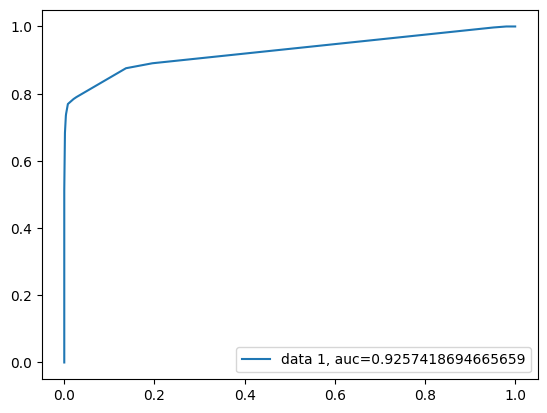

In [156]:
fpr, tpr, _ = metrics.roc_curve(y_train,  y_train_proba_clf)
auc = metrics.roc_auc_score(y_train, y_train_proba_clf)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

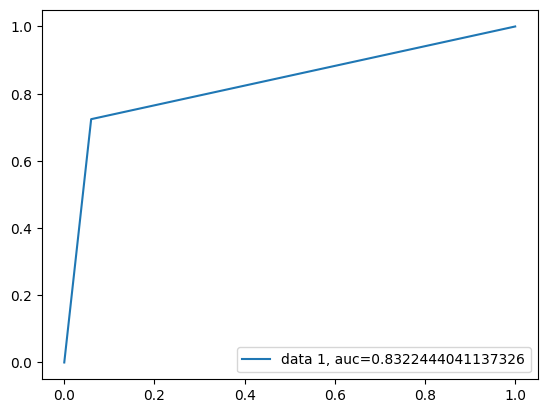

In [127]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_test_proba_clf)
auc = metrics.roc_auc_score(y_test, y_test_proba_clf)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [157]:
importance = clf.feature_importances_

In [158]:
importance

array([0.        , 0.12595677, 0.05598052, 0.        , 0.0128318 ,
       0.28381215, 0.        , 0.15047953, 0.        , 0.00674878,
       0.11907055, 0.08965482, 0.13693129, 0.00796742, 0.01056637,
       0.        , 0.        , 0.        ])

In [159]:
X_train.columns[np.argmax(importance)]

'DAY_CHARGE'